In [29]:
import pandas as pd

In [58]:
naive=pd.read_csv('naive_Multiplication_GPU.csv')

In [31]:
naive.head()

,Algorithm_Name,Input_Dimensions,Execution_Time(ms)
0,Naive_GPU,16,0.145286
1,Naive_GPU,32,0.157734
2,Naive_GPU,48,0.192416
3,Naive_GPU,64,0.135853
4,Naive_GPU,80,0.314778


In [33]:
naive["Execution_Time(ms)"]

0        0.145286
1        0.157734
2        0.192416
3        0.135853
4        0.314778
          ...    
261    119.379784
262    119.481671
263    120.487111
264    124.984937
265    399.945395
Name: Execution_Time(ms), Length: 266, dtype: float64

In [34]:
import seaborn as sns

<AxesSubplot:xlabel='Execution_Time(ms)'>

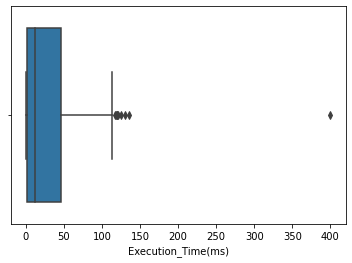

In [35]:
sns.boxplot(x=naive["Execution_Time(ms)"])

In [42]:
num.head(5)

0    16.145286
1    32.157734
2    48.192416
3    64.135853
4    80.314778
dtype: float64

In [39]:
num=naive["Execution_Time(ms)"]+naive["Input_Dimensions"]

In [40]:
Q1 = naive.quantile(0.25)
Q3 = naive.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Input_Dimensions      5608.000000
Execution_Time(ms)      45.044794
dtype: float64


In [41]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(num))
print(z)

[1.24407089 1.23923228 1.23438694 1.22956918 1.22468026 1.21989166
 1.21506123 1.21021638 1.20538963 1.20054294 1.19571165 1.19087225
 1.18603091 1.18118923 1.17635134 1.17151462 1.16665896 1.16184036
 1.15699423 1.15214287 1.14732235 1.14249788 1.13763431 1.13277428
 1.12793719 1.12309254 1.11827249 1.11340871 1.10859258 1.10376159
 1.09888917 1.0940542  1.08925238 1.08437704 1.07956452 1.07470969
 1.06986248 1.06500774 1.06018897 1.05533765 1.0504843  1.04566795
 1.040834   1.03592243 1.0311318  1.02629408 1.02133276 1.01638706
 1.0117366  1.00683766 1.00205444 0.99719455 0.99222578 0.98750829
 0.98262587 0.97785499 0.97289093 0.96810499 0.96331878 0.9584945
 0.95363415 0.94879602 0.94394905 0.93422149 0.92454077 0.91487265
 0.90519736 0.89547072 0.88575281 0.87605282 0.86638336 0.8566672
 0.84700248 0.83729622 0.82746624 0.81792026 0.8081247  0.79827594
 0.78870467 0.7790509  0.7692069  0.75961035 0.75002211 0.74029778
 0.73051587 0.72071796 0.71082275 0.70098923 0.69167535 0.681220

In [43]:
threshold = 3
print(np.where(z > 3))


(array([], dtype=int64),)


In [47]:
naive_mod = naive[~((naive < (Q1 - 1.5 * IQR)) |(naive > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-47-1f08036e0fe9>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  naive_mod = naive[~((naive < (Q1 - 1.5 * IQR)) |(naive > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-47-1f08036e0fe9>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  naive_mod = naive[~((naive < (Q1 - 1.5 * IQR)) |(naive > (Q3 + 1.5 * IQR))).any(axis=1)]


In [48]:
naive_mod.shape

(257, 3)

<AxesSubplot:xlabel='Execution_Time(ms)'>

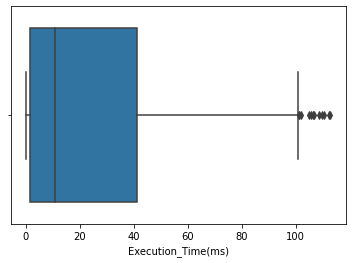

In [49]:
sns.boxplot(x=naive_mod["Execution_Time(ms)"])

In [50]:
naive_mod["Execution_Time(ms)"]

0        0.145286
1        0.157734
2        0.192416
3        0.135853
4        0.314778
          ...    
254    104.991869
255    106.224896
256    109.606561
257    110.306624
258    112.223949
Name: Execution_Time(ms), Length: 257, dtype: float64

In [53]:
print(naive_mod['Execution_Time(ms)'].quantile(0.50)) 
print(naive_mod['Execution_Time(ms)'].quantile(0.95)) 
naive_mod['Execution_Time(ms)'] = np.where(naive_mod['Execution_Time(ms)'] > 100.70, 10.90, naive_mod['Execution_Time(ms)'])
naive_mod.describe()

10.905542
100.70526699999999


<ipython-input-53-46e9f1e7fc6b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  naive_mod['Execution_Time(ms)'] = np.where(naive_mod['Execution_Time(ms)'] > 100.70, 10.90, naive_mod['Execution_Time(ms)'])


,Input_Dimensions,Execution_Time(ms)
count,257.000000,257.000000
mean,3874.863813,21.327353
std,3095.398806,26.443125
min,16.000000,0.135853
25%,1072.000000,1.577293
50%,3120.000000,10.900000
75%,6320.000000,31.723386
max,10544.000000,100.646318


In [59]:
print(naive['Execution_Time(ms)'].quantile(0.50)) 
print(naive['Execution_Time(ms)'].quantile(0.95))
naive.shape

11.898566
108.22010625


(266, 3)

In [60]:
naive['Execution_Time(ms)'] = np.where(naive['Execution_Time(ms)'] > 108.22, 11.90, naive['Execution_Time(ms)'])

In [61]:
naive['Execution_Time(ms)'] 

0       0.145286
1       0.157734
2       0.192416
3       0.135853
4       0.314778
         ...    
261    11.900000
262    11.900000
263    11.900000
264    11.900000
265    11.900000
Name: Execution_Time(ms), Length: 266, dtype: float64